# Week 1

## What is Scientific Visualization?

- visualization can mean many things
- data visualization
  - refers to visual techniques used to present information to other people
  - Charles Minard's chart: shows Napoleonic France's invasion of Russia
- information visualization
  - refers to the idea of displaying information that does not have some inherent spacial visual form
  - not a map or some physical space
  - for example, a graph showing shared scenes of characters in a novel
- scientific visualization
  - using visual techniques to display information that does have some sort of spatial or physical form
- distinction between information viz and scientific viz is not hard and fast: one is not necessarily not the other
  - the fields are more similar than different
- visual analytics
  - focuses on how to create computational tools for data analysis that use visualization
  - like a tool that allows you to make decisions about warranty information
- Topics for this semester
  - terrain visualization
    - visualization of global surface water temperature, for example
  - volume visualization
    - a simulation of a supernova
    - allows us to see many layers, trying to visualize some 3d space that is filled with a scalar field without obscuring anything
  - Isosurfaces
    - seeing bone in an MRI
  - flow visualization
    - moves from scalar to vector
  - tensor field visualization
    - tensors are sort of a generalization of vectors
    - at a point in space, information about something going in all directions (tensor)
    - can be applied in brain MRI's with tractography
  - bioinformatics visualization
    - comparing and exploring 2D genomic contact matrices

## The Purposes of Visualization

- this section was very visual, going through different visualizations used during the COVID-19 pandemic

## Representing Color

- how do digital display devices display images.. and how do we tell those devices what images to show us?
- most modern screens use a raster grid
  - a raster is a grid
  - a pixel is the smallest element in that raster
- most displays use LCD or OLED technology
  - Liquid Crystal Display, transmissive using a light-emitting diode backlight
  - Oranic Light Emitting Diode, uses emissive organic film to generate light
- 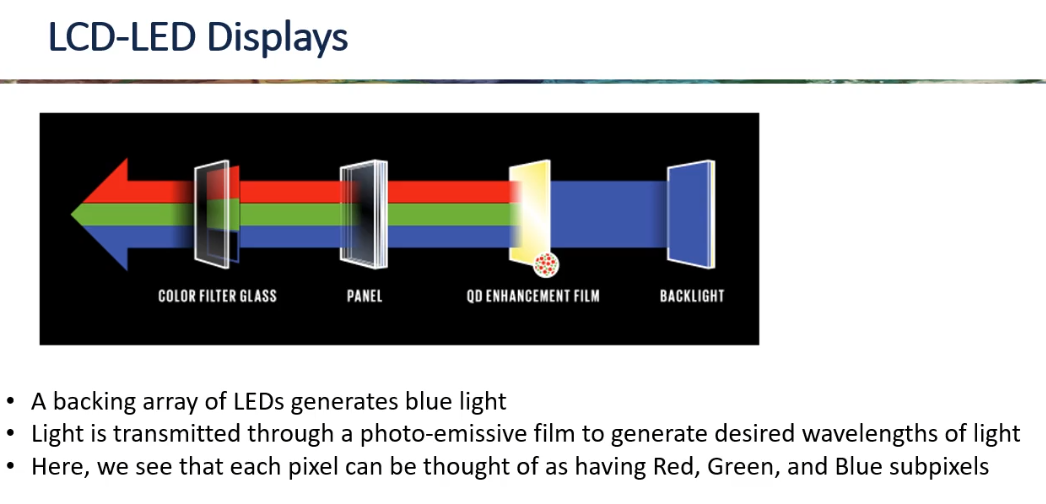
- 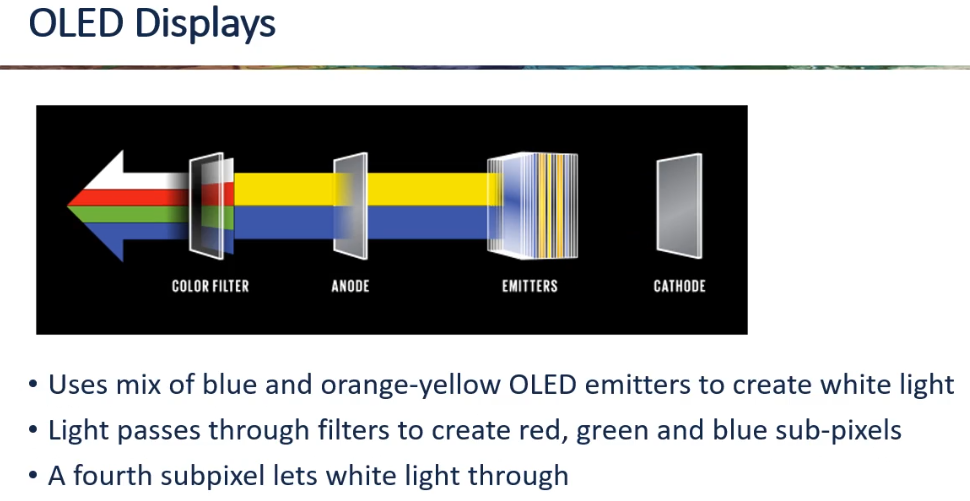
- Comparison between the two
  - OLED has deeper black levels, excellent viewing angle, fast refresh, can be manufactured on flexible substrates
  - LCD-LED is cheaper and more energy efficient
- RGB Color Space
  - emissive displays typicall use an RGB space to specify colors
  - R G and B are called primaries
  - each corresponds to a specific wavelength of light
  - R G and B are color channels
  - value of a channel is its intensity
- Sometimes there is a fourth channel called alpha (the opacity of the pixel)
- Operations on colors
  - turning on multiple lights could be just adding RGB values together to make white light
  - light off is subtracting RGB values
  - reflection would be multiplication

## Representing Intensity

- at display time, intensity values are in 8-bit representations
  - 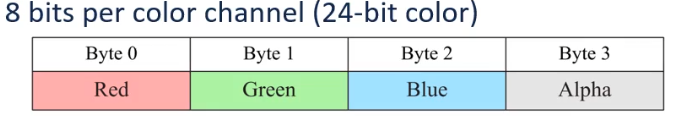
  - each channel is an 8-bit unsigned integer
  - will sometimes see hexadecimal expressions for a color range
- 256 values is a poor fit for human perception in color
- HDR uses 10 or 12 bits per color channel
- OpenEXR uses 16 bit floating point for each channel
- In application level code, keep color values as at least 32 bit floats
  - reduces impact of quantization on colors
  - reduction of precision will happen on GPU
  - 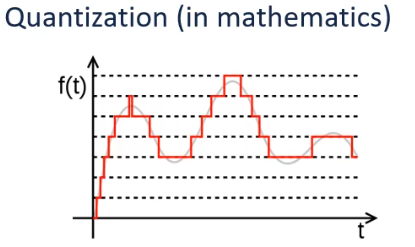
- We cannot be sure viewers will see the same colors that you compute
  - display differences
  - quantization in storage and/ or transmission to display
- If you map values to color, allow users to query for the original numerical value

## The HSV Color Space

- equivalent to RGB in terms of the color it can express, but can be easier to use in certain color picking or color generation applications
- 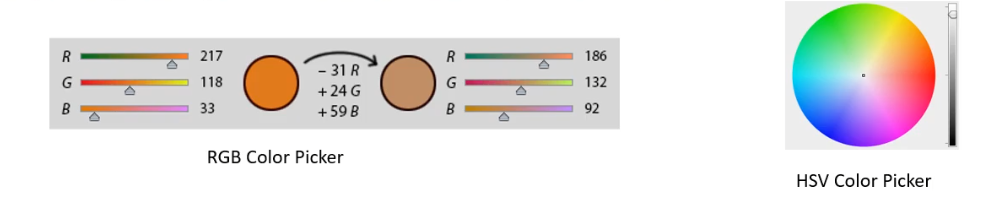
- It is hard to pick color in RGB, but easy in HSV
- Hue, Saturation, Value (HSV)
- Hue is an angle about the color wheel
- Saturation is a distance from gray
- Value is a distance from black
- 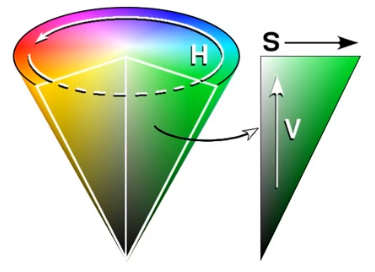
- RGB to HSV conversion
  - 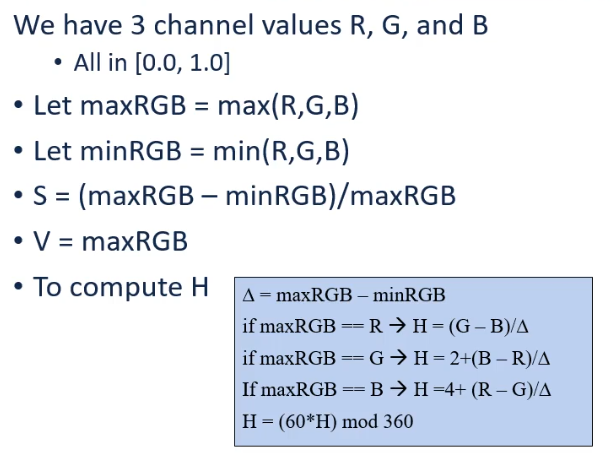
  - 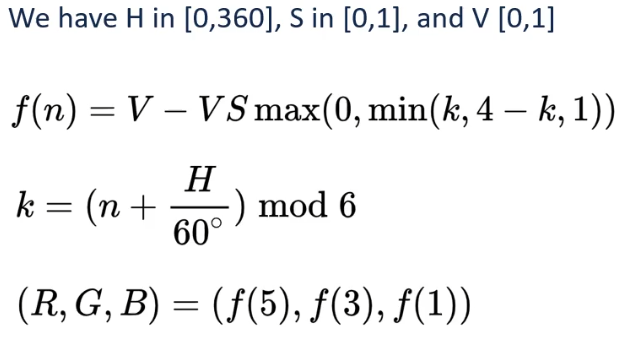
- Color spaces: lies your kindergarten teacher told you
  - red yellow and blue are not the primary colors
    - cyan, magenta, yellow.. used for reflective displays
    - printing.. or finger painting
  - any set of wavelengths can serve as primaries
    - some combinations generate more colors, some fewer
  - a 3 wavelength color space cannot produce all the colors a person can see